# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries

import pandas as pd
import numpy as np
import pylab as plt 
import seaborn as sns
import warnings
import chart_studio.plotly as py
import cufflinks as cf
import folium
import geopandas as gpd
from keplergl import KeplerGl


# Configuration

cf.go_offline()
warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (12, 4)
%matplotlib inline

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
fitbit = pd.read_csv('../data/Fitbit2.csv')

In [3]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

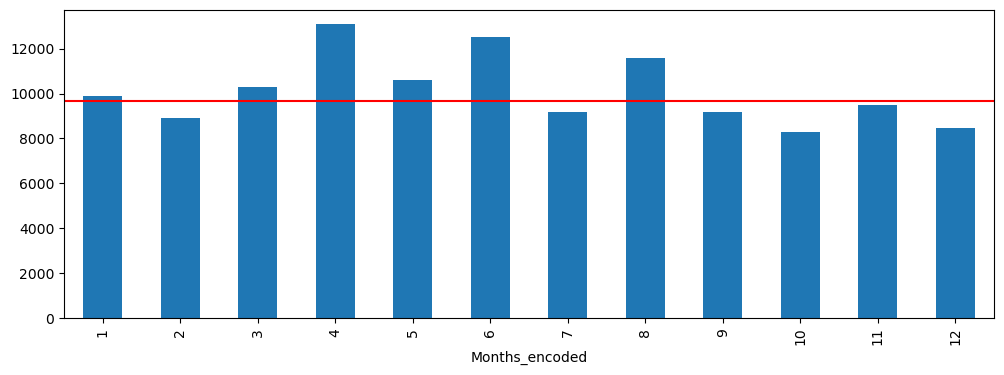

In [4]:
# AVERAGE STEPS BY MONTH_ENCODED (median in red)

med = fitbit.groupby('Months_encoded').mean()['Steps'].median() # Median value
fitbit.groupby('Months_encoded').mean()['Steps'].plot(kind = 'bar') # Histogram
plt.axhline(y = med, color = 'r', linestyle = '-') # Plotting median as horizontal line
plt.savefig('../figures/1.steps_by_month.png')

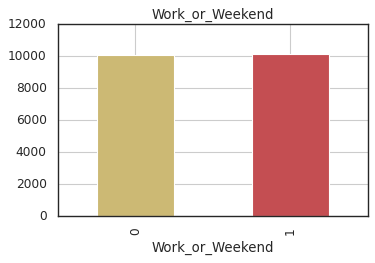

In [35]:
# AVERAGE STEPS BY WORK_OR_WEEKEND

plt.rcParams['figure.figsize']=(5, 3)

fig2 = fitbit.groupby('Work_or_Weekend').mean()['Steps'].plot(kind = 'bar',
        color = ['y', 'r'],
        grid = True,
        title = 'Work_or_Weekend');

plt.savefig('../figures/1.steps_by_work_or_week.png')

# There is no big difference between the average steps in weekends or during work.

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

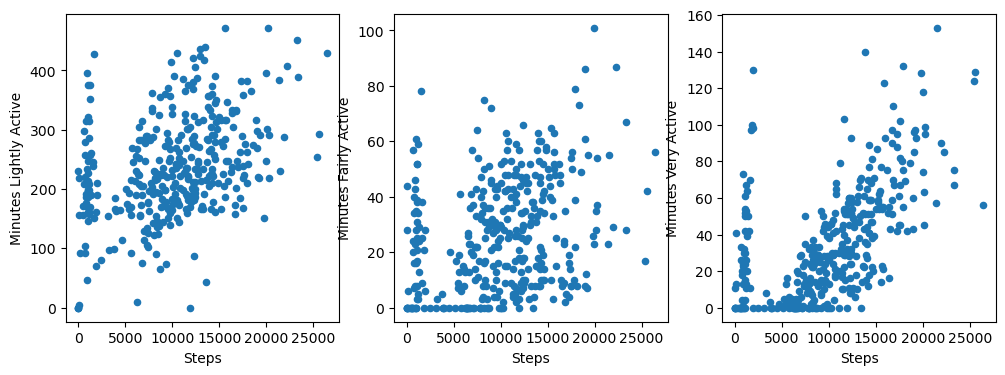

In [6]:
plt.rcParams['figure.figsize']=(12, 4)

fig, ax = plt.subplots(1, 3) 
columns = ['Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active']

for i in range(3):
    
    fitbit.plot.scatter(ax = ax[i], x = 'Steps', y = columns[i])
    
plt.savefig('../figures/1.subplots_scatter_steps.png')

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

#### Explore the titanic dataset using Pandas dtypes.

In [7]:
titanic = pd.read_csv('../data/titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [9]:
# NUMERICAL VARIABLES

titanic.select_dtypes(include = ['int64', 'float64']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [10]:
# CATEGORICAL VARIABLES

titanic.select_dtypes(include = 'object').columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [11]:
plt.rcParams['figure.figsize']=(12, 6)
plt.style.use('classic')
sns.set_style('dark')

#### Use the right visulalization to show the distribution of column `Age`.

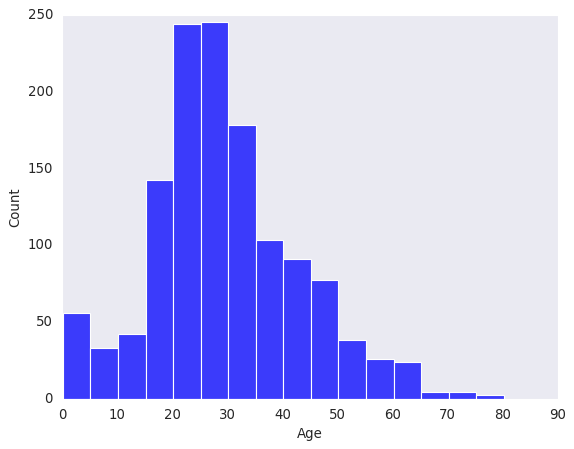

In [12]:
# Let's change to seaborn

sns.histplot(x = titanic.Age,
             binwidth = 5, # Anchura 5 años
            );

plt.savefig('../figures/2.age_hist.png')

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

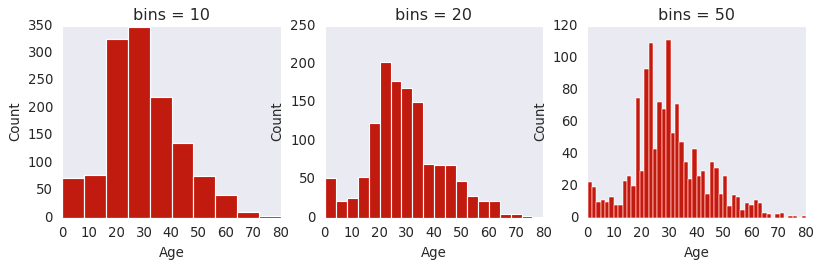

In [13]:
plt.rcParams['figure.figsize'] = (12, 3)

fig, ax = plt.subplots(1, 3) 

for i in range(3):
    
    sns.histplot(ax = ax[0], x = titanic.Age,
             bins = 10,
            );
    ax[0].set_title('bins = 10')
    
    sns.histplot(ax = ax[1], x = titanic.Age,
             bins = 20,
            );
    ax[1].set_title('bins = 20')
    
    sns.histplot(ax = ax[2], x = titanic.Age,
             bins = 50,
            );
    ax[2].set_title('bins = 50')
    


plt.savefig('../figures/2.subplots_age_hist.png')

#### How does the bin size affect your plot?

It affects the height of the frecuency values, because in each case a different amount of data is groupped in each bin. It also affects to shape of envelope curve.

#### Use seaborn to show the distribution of column `Age`.

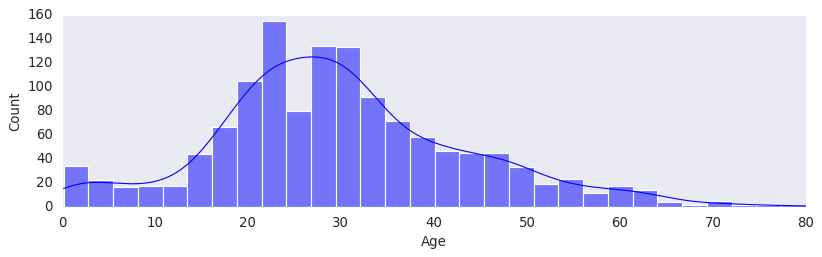

In [14]:
sns.histplot(x = titanic.Age,
             kde = True,
            );

plt.savefig('../figures/2.age_hist_2.png')

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [15]:
titanic.Name.isna().sum()

0

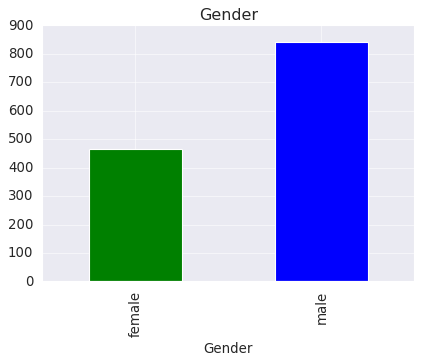

In [16]:
# Method 1 - matplotlib

titanic.groupby('Gender').count()['Name'].plot(kind='bar', # Nos quedamos con Name porque no tiene nulos
        color = ['g', 'b'],
        grid = True,
        figsize = (6, 4),
        title = 'Gender'
);

plt.savefig('../figures/2.gender_count.png')

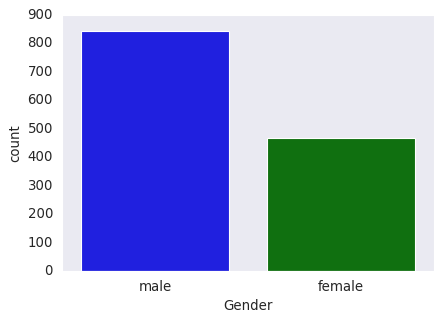

In [17]:
# Method 2 - seaborn

plt.rcParams['figure.figsize'] = (6, 4)
sns.countplot(x = titanic.Gender);

# plt.savefig('../figures/gender_hist_seaborn.png') 
# No lo guardo porque es lo mismo

#### Use the right plot to visualize the column `Pclass`.

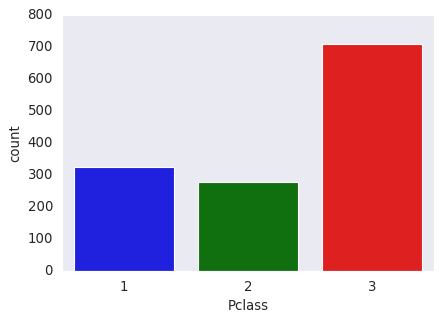

In [18]:
sns.countplot(x = titanic.Pclass);

plt.savefig('../figures/2.pclass_count.png')

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

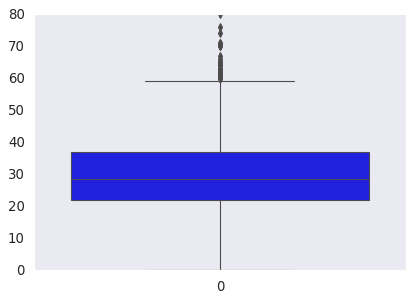

In [19]:
sns.boxplot(data = titanic.Age, 
            color = 'b');

plt.savefig('../figures/2.age_boxplot.png')

The boxplot graph summarizes the main statistic quantities: median, IQR, minimum, maximum, range etc.

#### What does the last plot tell you about the feature `Age`?

Half of the people traveling with Titanic where above 20 and below 40 years old. There where infants on board, because the minimum age goes right down to 0. Some outliers appear at the upper part of the plot, revealing elderly passengers away from the median of the distribution.

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

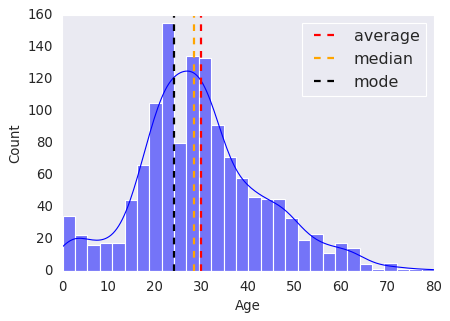

In [20]:
sns.histplot(x = titanic.Age,
             kde = True,
            );

plt.axvline(titanic.Age.mean(),
            c='r',
            linewidth=2.,
            linestyle='--',
            label='average')

plt.axvline(titanic.Age.median(),
            c='orange',
            linewidth=2.,
            linestyle='--',
            label='median')

plt.axvline(titanic.Age.mode()[0],
            c='black',
            linewidth=2.,
            linestyle='--',
            label='mode');
plt.legend();

plt.savefig('../figures/2.age_hist_statistics.png')

#### What additional information does the last plot provide about feature `Age`?

We can add the average and mode value (in the boxplot chart they do not appear) and see the rate of spreading of the data in both directions. We can see that the number of infants is not negligible, and that there where a lot of babies with less than 2 years old on board.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

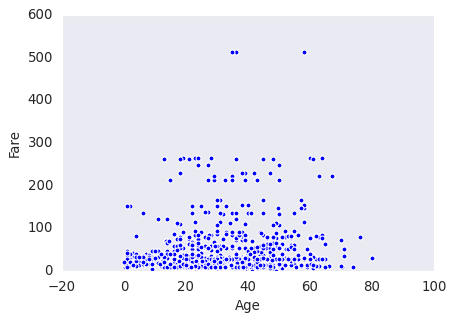

In [21]:
# Method 1 - matplotlib

titanic.plot.scatter(x = 'Age', y = 'Fare')
plt.ylim(0, 600);   # Empezamos en 0

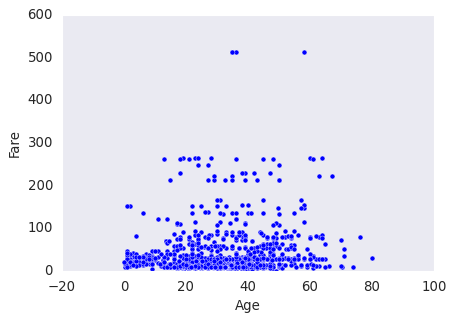

In [22]:
# Method 2 - seaborn

sns.scatterplot(data = titanic,
                x = 'Age',
                y = 'Fare')

plt.ylim(0, 600);

plt.savefig('../figures/2.fare_age_scatter.png')

#### Plot the correlation matrix using seaborn.

In [23]:
# Before that, we change the Gender column to a boolean type so that we can also see the correlations with this 
# feature:

titanic.Gender = [0 if 'female' in i.lower() else 1 for i in titanic.Gender]

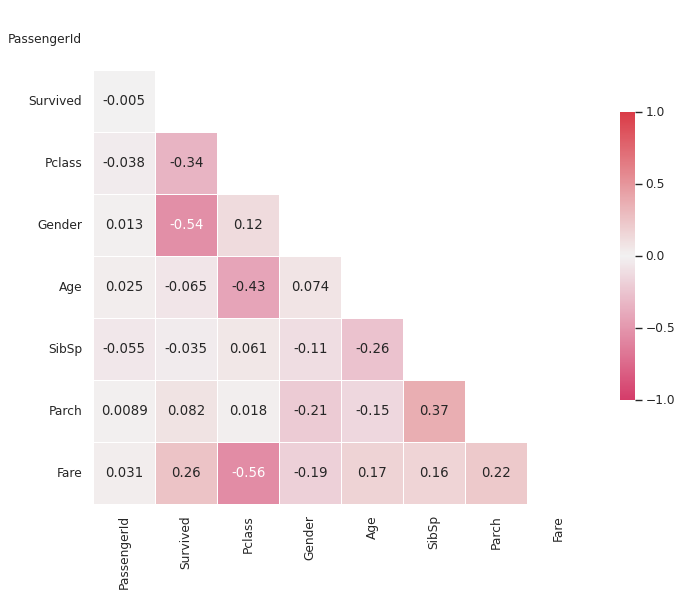

In [33]:
# Usemos el código que hemos visto hoy, que la deja muy bonita

sns.set(style = 'white')
mascara = np.triu(np.ones_like(titanic.corr(), dtype = bool))
cmap = sns.diverging_palette(0, 10, as_cmap = True) 

sns.heatmap(titanic.corr(), 
            mask=mascara,
            cmap=cmap,
            vmax=1,
            vmin=-1,
            center=0,
            square=True,
            linewidth=0.5,
            cbar_kws={'shrink': 0.5},
            annot=True
           )

plt.rcParams['figure.figsize'] = (8, 9);
plt.savefig('../figures/2.correlation_plot.png')

#### What are the most correlated features?

One of the strongest correlations is the one between the Gender and the survival, which is inverse. As we assigned 1 to the men and 0 to the women to make that column nummerical, the inverse correlation indicates the women survived more than the men, which can answer to cultura and gender bias reasons.

There are also strong correlations happen among the PClass and other features:

+ The fare is inversly correlated to the class, suggesting the lower classes (classes 3-2) payed less for their boarding pass than the higher ones (1-2).
+ The same kind of correlation happens with the survival, although it is less strong. 


#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [25]:
# Let's create a function:

def age_pclass(pclass, ax):
    
    subdf = titanic[titanic.Pclass == pclass] 
    sns.histplot(ax = ax[pclass-1], x = subdf.Age,
                 kde = True,
                )
    
    ax[pclass-1].set_title(f'Class {pclass}')
    
    ax[pclass-1].axvline(subdf.Age.mean(),
                c='r',
                linewidth=2.,
                linestyle='--',
                label='average')

    ax[pclass-1].axvline(subdf.Age.median(),
                c='orange',
                linewidth=2.,
                linestyle='--',
                label='median')

    ax[pclass-1].axvline(subdf.Age.mode()[0],
                c='black',
                linewidth=2.,
                linestyle='--',
                label='mode')

    ax[pclass-1].legend()


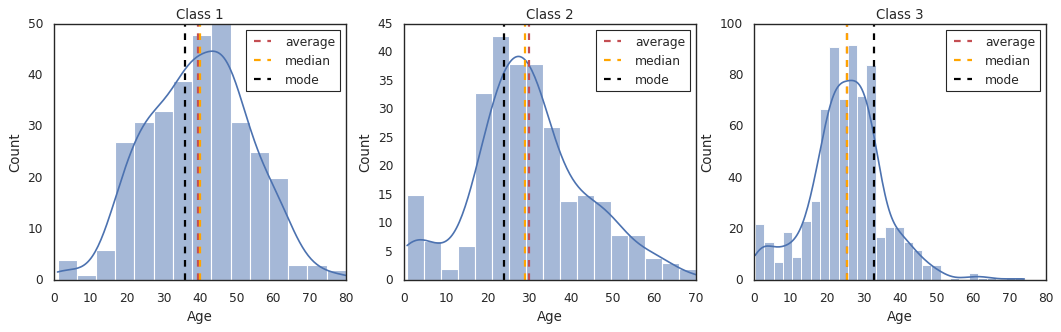

In [26]:
plt.rcParams['figure.figsize'] = (16, 4)

fig, ax = plt.subplots(1, 3) 

age_pclass(1, ax)
age_pclass(2, ax)
age_pclass(3, ax)


plt.savefig('../figures/2.age_pclass_hist.png')

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

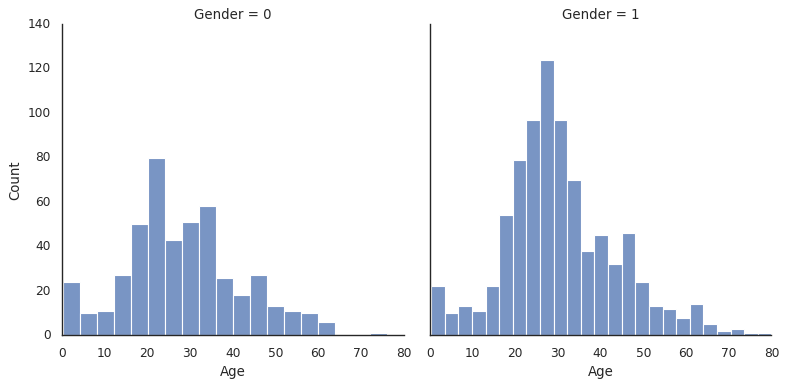

In [27]:
# Ah, much easier with that

g = sns.FacetGrid(titanic, col = "Gender", height=5, aspect=1)
g.map(sns.histplot, 'Age');

plt.savefig('../figures/2.age_gender_hist.png')